In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
import datetime
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
import matplotlib.gridspec as gridspec

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1]

In [10]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [11]:
convert_date = lambda x: datetime.datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date)
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [13]:
crops = list(data['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [14]:
n = len(crops)

In [39]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(2,2)
    df = dfdates[dfdates['Crop']==crop[i]]
    
    dates = ['Planting date','Harvest date']
    
    ax1 = fig.add_subplot(gs[0,:])
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    
        
    index_planting = [k for k in df[dates[0]].index.values if df.loc[k,dates[0]].year == 2017]
    index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2017]
    title = '2017.'
    
    if crop[i] == 'Barley':
        index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2018]
        ax1.clear()
        ax1.hist(df['Planting date'],color='darkgreen')
        ax1.hist(df['Harvest date'],bins=2,color='darkorange')
        title = '2018.'
    if crop[i] == '2nd soybean':
        ax1.clear()
        ax1.hist(df['Planting date'],color='darkgreen')
        ax1.hist(df['Harvest date'],bins=4,color='darkorange')
    ax1.set_ylabel('counts',fontsize=16)
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    ax1.set_facecolor('w')
    
    p_dates = df[dates[0]].loc[index_planting]
    h_dates = df[dates[1]].loc[index_harvest]
    
    
    ax = fig.add_subplot(gs[1,0])
    ax.hist(p_dates.values,color='darkgreen')
    ax.set_title('Distribution of '+dates[0]+' for 2017. year')
    ax.set_ylabel('counts',fontsize=10,fontstyle='italic')
    ax.set_xlabel(dates[0], fontsize=10,fontstyle='italic')
    ax.grid(axis='y',color='lightgrey',alpha=0.5)
    ax.set_facecolor('w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(55)
    ax2 = fig.add_subplot(gs[1,1])
    ax2.hist(h_dates.values,color='darkorange')
    ax2.set_title('Distribution of '+dates[1]+' for '+title+' year')
    ax2.set_ylabel('counts',fontsize=10)
    ax2.set_xlabel(dates[1], fontsize=10)
    ax2.grid(axis='y',color='lightgrey',alpha=0.5)
    ax2.set_facecolor('w')
    
    for tick in ax2.get_xticklabels():
        tick.set_rotation(55)
        
    pd = np.arange(p_dates.min()-datetime.timedelta(days=10),p_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1)) 
    hd = np.arange(h_dates.min()-datetime.timedelta(days=10),h_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1))

    ax.set_xticklabels([str(d)[:10] for d in pd])
    ax2.set_xticklabels([str(d)[:10] for d in hd])
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 30, y=0.99, fontweight='bold')
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    plt.savefig(crop[i]+".png", dpi=100)
    plt.show()
    

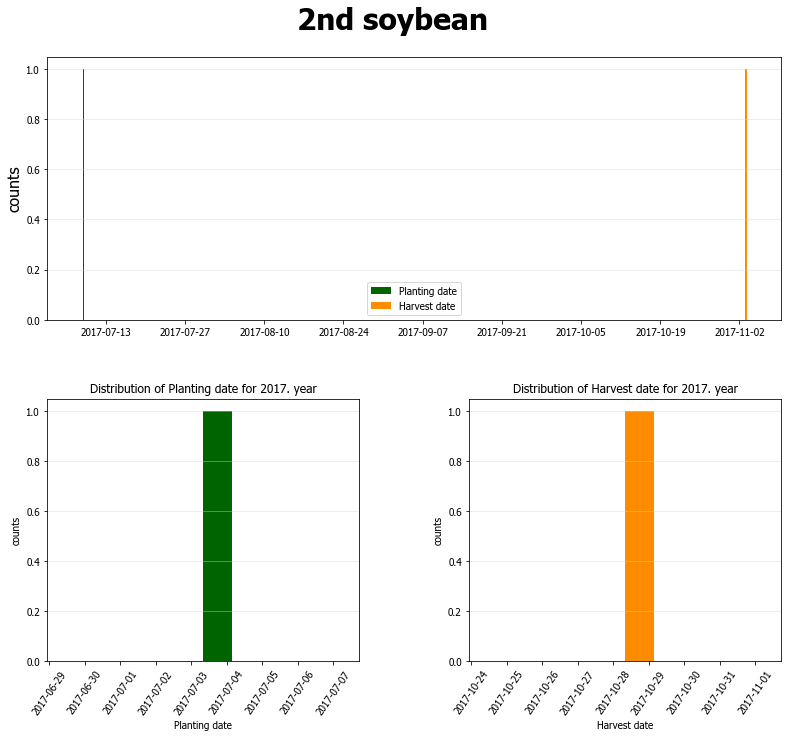

In [40]:
plot_ph_date(dfdates,6)

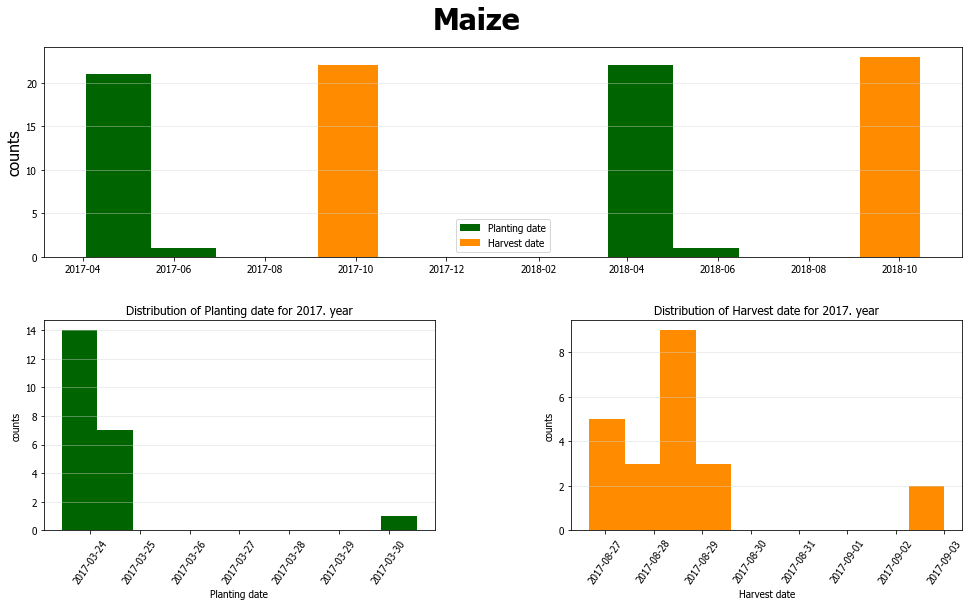

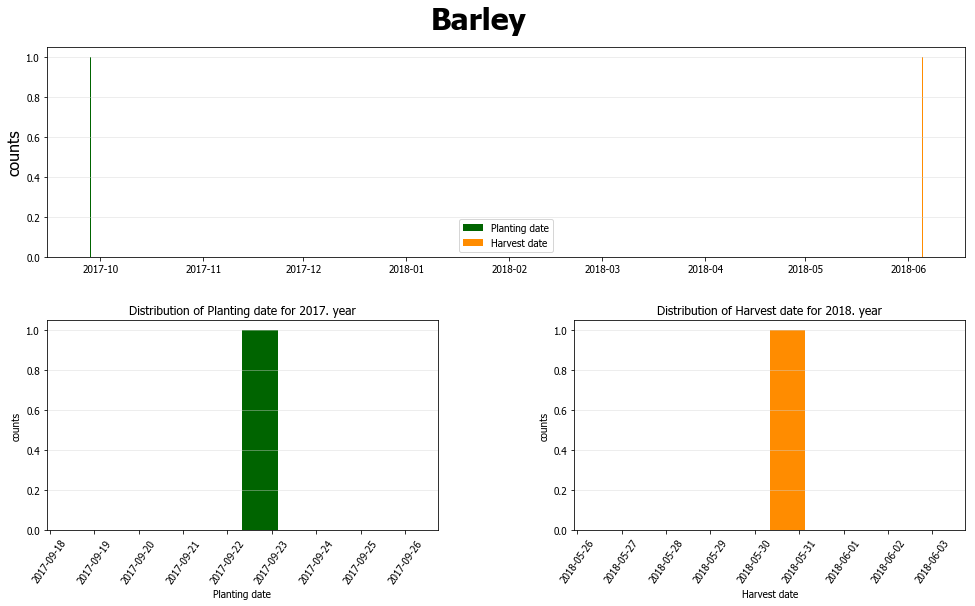

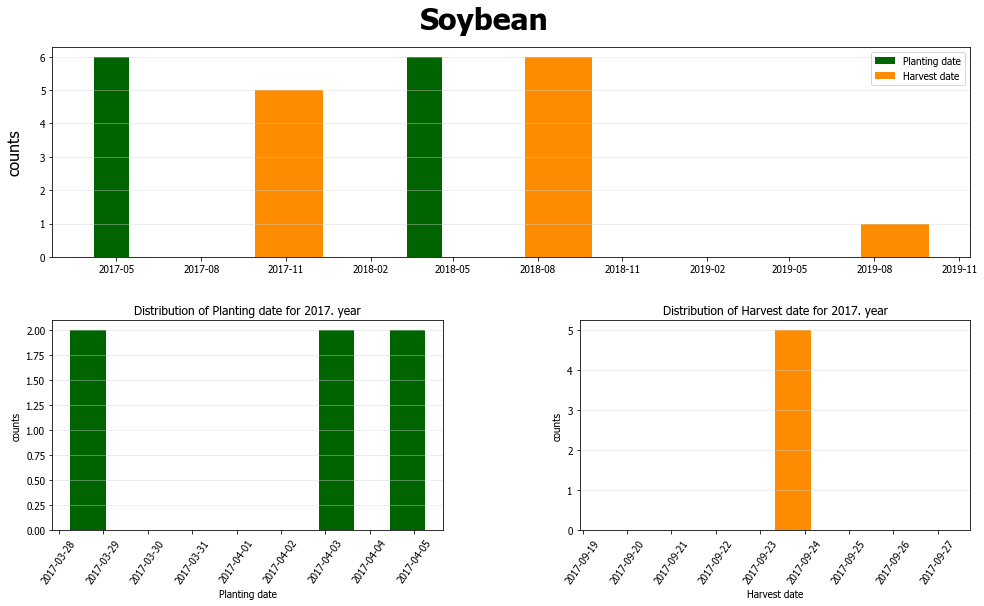

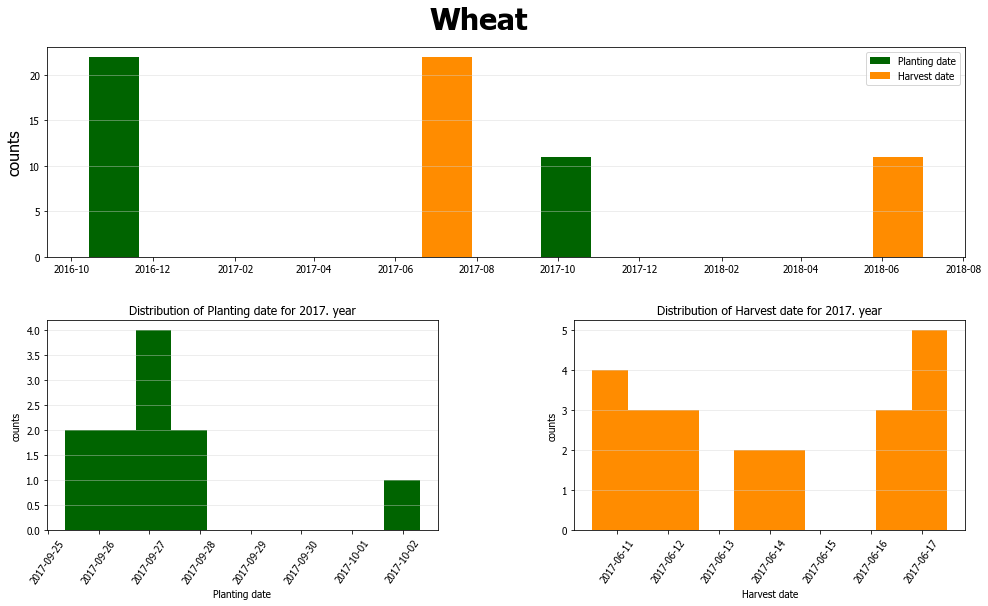

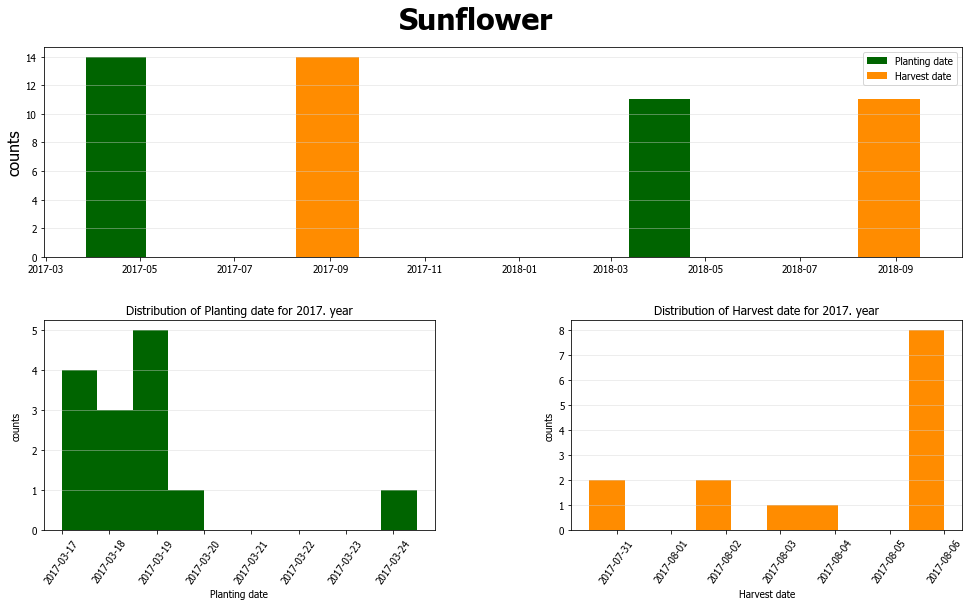

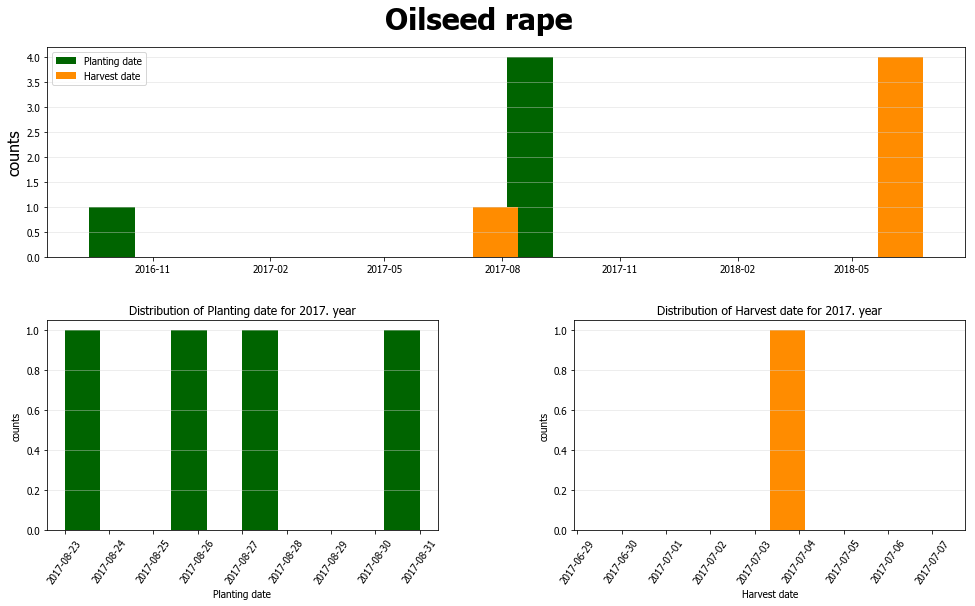

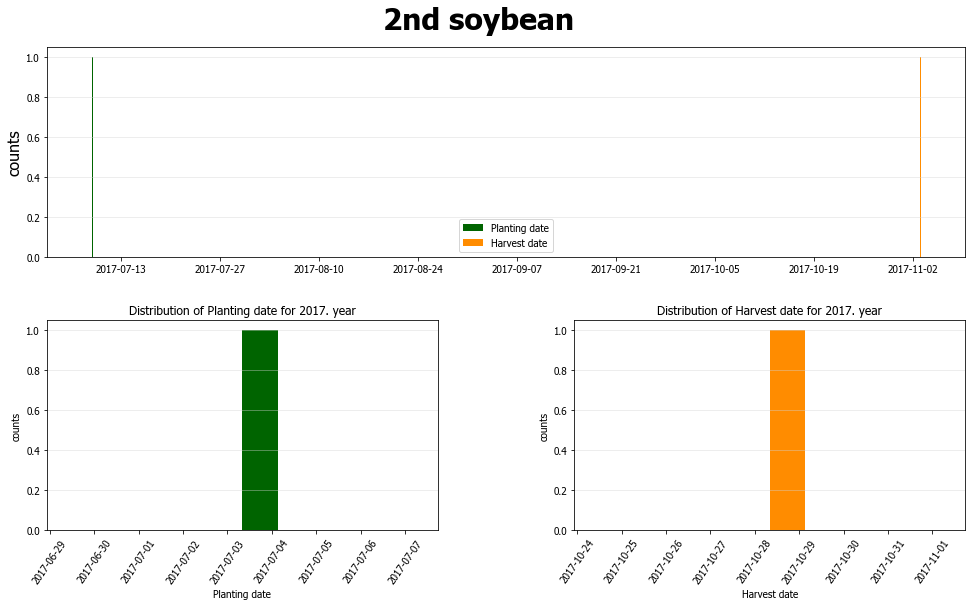

In [24]:
for i in range(n):
    plot_ph_date(dfdates,i)

In [ ]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = ['steelblue','darkorange','darkgreen']
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    if df2.shape[0] <= 2:
        fig = plt.figure(figsize=(10,1))
        ax = fig.add_subplot(111)
        ax.text(0.1,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    
    
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=13, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],x=0.5,y=1.05,fontsize=20,fontweight='bold')
        plt.show()

In [ ]:
plot_yield(data,0)

In [ ]:
for i in range(n):
    plot_yield(data,i)

In [ ]:
def func(pct, allvals):
    percent = float((100*pct)/allvals.sum())
    return "{:.2f}%".format(pct,percent)

In [ ]:
for i in range(n):
    
    df5 = data[data['Crop'] == crops[i]]
    length = len(df5['Variety'].unique())
    
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie, labels=list(pie.index.values),autopct=lambda pct: func(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
        plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
        ax5.set_title(crops[i],fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
        ax5.legend(loc=1,fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        ax5.text(-1,1,text,bbox=props,fontsize=15,va='top', ha='left')

        ax5.axis('off')
    
    
        fig5.tight_layout()
plt.show()

In [ ]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0,margins=True)
pivot

In [ ]:
chi2,p,q,expected = stats.chi2_contingency(pivot)
chi2,p,q

In [ ]:
def cdf(x,q):
    return 1/(math.pow(2,q/2)*math.gamma(q/2))*math.pow(x,q/2-1)*math.pow(math.e,-x/2)
def cdf_array(x,q):
    l = []
    for i in x:
        l.append(float(cdf(i,q)))
    return np.array(l)

In [ ]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})

x = np.linspace(0,150,150)
ax = sns.lineplot(x,cdf_array(x,q),label='chi-squared distribution function',linewidth=3.3)



ax.plot([chi2], [cdf(chi2,q)], 'o',markersize=10)
ax.text(chi2-5,cdf(chi2,q)-0.002,str(round(chi2,2)))
ax.annotate(r'$\chi^2 $ reg',xy=(chi2,0),xytext=(chi2+1,0.004),arrowprops=dict(facecolor='b', shrink=0.05))

alpha = stats.chi2.ppf(0.99,q)
ax.fill_between(x,0,cdf_array(x,q),where=x>alpha,color='r')
ax.plot([alpha], [0], 'o',markersize=10)
ax.text(alpha-2,cdf(chi2,q)-0.002,str(round(stats.chi2.ppf(0.99,q),2)))
ax.annotate(r'$ \alpha $ = 0.01',xy=(alpha,0),xytext=(alpha+5,0.005),fontsize=15,arrowprops=dict(facecolor='b', shrink=0.05))
ax.text(90,0.005,'$ H_0 $ rejection region',fontsize=20)

if p <= 0.01:
    ax.text(100,0.03,'Previous crop and Crop attribute\n are dependent at level confidence 0.01.',ha='center',wrap=True,fontsize=20)
elif p <= 0.05:
    ax.text(100,0.03,'Previous crop and Crop attribute are dependent at level confidence 0.05.',ha='center',wrap=True,fontsize=20)
else:
    ax.text(100,0.03,'Previous crop and Crop attribute are independent.',ha='center',wrap=True,fontsize=20)

""" If the null hypothesis is true, the observed and expected frequencies will be close in value and the χ2 statistic will be 
close to zero. If the null hypothesis is false, then the χ2 statistic will be large"""
ax.set_title('Chi-squared distribution (q = '+str(q)+') for Previous crop - Crop',fontsize=20,fontweight=5)
plt.show()

In [ ]:
dfdates['Duration of \n season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [ ]:
dfdates['Duration of \n season (days)'] = dfdates['Duration of \n season (days)'].apply(lambda x: float(x.days))
dfdates

In [ ]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (8, 8)})
    ax = sns.heatmap(sigmaCorr, square=True, annot=True,annot_kws={'fontsize': 20},cmap="YlGn")
    ax.set_yticklabels(list(y),fontsize=13,rotation=0)
    ax.set_xticklabels(list(y),fontsize=13,rotation=90)
    plt.title('Heat map for correlation', fontsize='20')
    return sigmaCorr

In [ ]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of \n season (days)']

In [ ]:
dfcorr = dfdates[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [ ]:
dfcorr.dtypes

In [ ]:
corr(dfcorr)

In [ ]:
costs = list(data)[11:20]
costs

In [ ]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [ ]:
data['Profit'] = data['Revenue'] - dfcosts.sum(axis=1)

In [ ]:
sort = data['Profit'].sort_values(ascending=False)

In [ ]:
parcel = []
crop_list = []
area = []
profit = []
yield_ = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [data.loc[i,'Parcel']]
    crop_list += [data.loc[i,'Crop']]
    area += [round(data.loc[i,'Area'],2)]
    yield_ += [round(data.loc[i,'Yield']*1000,2)]
d = {'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Yield (kg/ha)': yield_,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['Parcel','Area (ha)','Crop','Yield (kg/ha)','Profit (RSD/ha)'])
top5

In [ ]:
grouped_profit = data['Profit'].groupby(data['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

In [ ]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})
palette=['lightsteelblue','plum','lightgreen','burlywood','lightsalmon','navajowhite','gold']
ax = sns.boxplot(x='Crop',y='Profit',data=data[['Crop','Profit']],palette=palette)

box_line_col = ['steelblue','indigo','darkgreen','saddlebrown','darkred','darkorange','gold']

for j,col in enumerate(box_line_col):
    mybox = ax.artists[j]
    mybox.set_edgecolor(col)
    for k in range(j*6,j*6+6):
        line = ax.lines[k]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax.set_ylabel('profit',fontsize=15,style='italic')
ax.set_xlabel('crop',fontsize=15,style='italic')
ax.set_xticklabels(crops,fontsize=16)

ax.set_title('Profit by crop', fontsize=20)
plt.show()

In [ ]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

In [ ]:
profit_std = grouped_profit.std()
profit_std

In [ ]:
relative = profit_std.apply(lambda x: x**2)/profit_mean
relative

In [ ]:
import statistics
df5 = data[data['Crop'] == 'Barley']
statistics.variance(df5['Profit'].values)

In [ ]:
sorted_relative = relative.sort_values(ascending=False)
sorted_relative

In [ ]:
#fn = {'fontname':'DejaVu Sans'}
palette = ['tomato','springgreen','goldenrod','lightgreen','mediumaquamarine','yellowgreen']

for i in range(n):
    if crops[i] == '2nd soybean':
        continue
    fig = plt.figure(figsize=(8,8),facecolor=palette[i])
    gs = gridspec.GridSpec(2,2)
    data2 = data[data['Crop'] == crops[i]]
    ax = fig.add_subplot(gs[0,0])
    sns.boxplot(x='Crop',y='Profit',data=data2,ax=ax, palette=['burlywood'])
    ax.set_facecolor(palette[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('dimgray')
    ax.tick_params(axis='y', colors='k',labelsize=15)
    ax.tick_params(axis='x', colors='k',labelsize=15)
    plt.ylabel('Profit',fontsize=15)
    plt.xlabel('Crop',fontsize=15)
    ax.grid(None)
    rect = ax.patch
    rect.set_facecolor(palette[i])
    rect.set_height(2)
    rect.set_width(2)
    rect.set_xy((0.005,0.005))
    plt.figtext(0.6,1,'Mean profit \n'+str(round(profit_mean[crops[i]],2)),fontsize=30,fontweight='bold')
    plt.figtext(0.6,0.8,'Relative profit \n'+str(round(profit_mean[crops[i]],2)),fontsize=30,fontweight='bold')
    
    fig.suptitle(crops[i],x=0.3,y=1.3,fontsize=50,fontweight='bold',fontdict=fn)
    fig.tight_layout()    
plt.show()

In [ ]:
import matplotlib
palette = ['tomato','springgreen','goldenrod','lightsteelblue','violet','yellowgreen']
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(6,6)
for i in range(n):
    if crops[i] == '2nd soybean':
        continue
    ax = fig.add_subplot(gs[0,1])

In [ ]:
print(plt.style.available)

In [ ]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

In [ ]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

In [ ]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

fp_mean['Fertiliser amount'].plot(kind='bar', color='darkgreen', ax=ax, width=width, position=1,rot=0,fontsize=20)
fp_mean['Pesticide amount'].plot(kind='bar', color='darkorange', ax=ax2, width=width, position=0,rot=0,fontsize=20)

ax.set_ylabel('fertiliser amount (kg/ha)',fontsize=15)
ax2.set_ylabel('pesticide amount (kg/ha)',fontsize=15)
ax.set_xlabel('crop',fontsize=20)
ax.legend(['Fertiliser amount'],loc='upper left', fontsize=15)
ax2.legend(['Pesticide amount'],loc='upper right',fontsize=15)
ax.set_facecolor('w')
ax.grid(axis='y',color='darkgrey')
ax2.grid(None)

fig.suptitle('Fertiliser and pesticide consumption (kg/ha)',x=0.5,y=1,fontsize=30,fontweight='medium')
plt.show()

In [ ]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

In [ ]:
top3_var = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=True)[:3]
top3_var

In [ ]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=True)[:3]
top3_var_f

In [ ]:
a = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
a

In [ ]:
def func2(pct, allvals):
    percent = float((100*pct)/sum(allvals))
    return "{:.2f}%".format(pct,percent)

In [ ]:
def evaluate_decision(data,command=False):
    table = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
    average_profit = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
    crops = []
    index = list(average_profit.index.values)
    good_decision = []
    profit = []
    num = 0
    not_enough_data = 0
    for i in range(data.shape[0]):
        crop_today = data.loc[i,'Crop']
        crop_before = data.loc[i,'Previous crop']
        year = data.loc[i,'Year']-1
        
        profit_today = data.loc[i,'Profit']
        oportunities = table.loc[crop_before]
        sorted_oportunities = oportunities.sort_values(ascending=False)
        
        if list(sorted_oportunities.index.values)[0] == crop_today:
            crop_tomorrow = list(sorted_oportunities.index.values)[1]
        else:
            crop_tomorrow = list(sorted_oportunities.index.values)[0]
        if (crop_tomorrow,year) in index:
            posible_profit = average_profit.xs((crop_tomorrow,year))
        else:
            year = year - 1
            if (crop_tomorrow,year) in index:
                posible_profit = average_profit.xs((crop_tomorrow,))
            else:
                not_enough_data += 1
        if profit_today > posible_profit:
            good_decision += [data.loc[i,'Parcel']]
            crops += [crop_tomorrow]
            profit += [posible_profit]
        else:
            num += 1
    
    if command == True:
        d = {'Parcel': good_decision,'Crop': crops, 'Posible profit': profit}
        return pd.DataFrame(d)
    else:
        return num,not_enough_data,len(good_decision)
    

In [ ]:
num, not_enough_data, good = evaluate_decision(data)

In [ ]:
def on_click(event):
    if event.dblclick:
        evaluate_decision(data,command=True)
def _yes(event):
    print('yoyo')

In [ ]:
from matplotlib.widgets import Button

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
    
pie = [num,not_enough_data,good]
wedges, texts, autotexts = ax.pie(x=pie, labels=['Decision could be better','Not enough data','Good decision'],
                                      autopct=lambda pct: func2(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
ax.set_title('Evaluate decision making',fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
ax.legend(loc=1,fontsize=10)
props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
text = "Parcel with good farmer's decision: \n"
"""for parcel in list(good_decision.keys()):
text += '\u2022'+parcel+'\n'
plt.figtext(0.99,0.4,text,bbox=props,fontsize=15,va='top', ha='left')"""

ax.axis('off')

plt.connect('button_press_event',on_click)
ax6 = fig.add_subplot(122)
axparcel = plt.axes([0.7, 0.8, 0.1, 0.075])
button = Button(axparcel, 'List of parcel')
button.on_clicked(_yes)

ax6.axis('off')
    

plt.show()